In [172]:
# import os
import sqlite3 as sql
from sqlite3 import Error
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.offline as py
import matplotlib.pyplot as plt
from matplotlib import pyplot as pt
import matplotlib
import seaborn as sns
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

# Loading datasets from both the sheets into dataframes

In [2]:
dataset1 = pd.read_excel(r'online_retail_II.xlsx' , sheet_name='Year 2009-2010')
dataset2 = pd.read_excel(r'online_retail_II.xlsx' , sheet_name='Year 2010-2011')

In [147]:
len(dataset1.index),len(dataset2.index)

(525461, 541910)

# A1 : Dataframes are concatenated to form a single dataframe

In [17]:
dataset = dataset1.append(dataset2,ignore_index = True)

# Row count of the dataframe is computed (Total row count)

In [18]:
print("Total row count : ",len(dataset.index))

Total row count :  1067371


# A2: Analysing and building a profile of available dataset

In [105]:
print("Length of dataset : ", len(dataset.index))
print("         ")
print("***          ****       Description          ****              ***")
print("         ")
print("Missing Counts in Description : ",len(dataset['Description']) - dataset['Description'].count())
print("Unique number of Descriptions : ",dataset['Description'].count())
print("         ")
print("***          ****       Quantity          ****              ***")
print("         ")
print("Mean of Quantity : ",dataset['Quantity'].mean())
print("Minimum Quantity : ",dataset['Quantity'].min())
print("Maximum Quantity : ",dataset['Quantity'].max())
print("Sum of entire Quantities : ",dataset['Quantity'].sum())
print("Unique number of quantities : ",len(dataset['Quantity'].value_counts()))
print("Number of entries for which Quantity is negative : ",len(dataset[dataset['Quantity'] < 0]))
print("Number of entries for which Quantity is positive : ",len(dataset[dataset['Quantity'] > 0]))
print("         ")
print("***          ****       Price          ****              ***")
print("         ")
print("Unique number of price values : ",len(dataset['Price'].value_counts()))
print("Average price value across all items : ",dataset['Price'].mean())
print("Minimum price : ",dataset['Price'].min())
print("Maximum price : ",dataset['Price'].max())
print("Unique number of price values which are more than 1000 : ",len(dataset[dataset['Price'] > 1000]['Price'].value_counts()))
print("Price values which are negative : ",len(dataset[dataset['Price'] < 0]))
print("Price values which are positive : ",len(dataset[dataset['Price'] > 0]))
print("         ")
print("***          ****       Customer          ****              ***")
print("         ")
print("Missing Counts in Customer id's : ",(len(dataset['Customer ID']) - dataset['Customer ID'].count()))
print("         ")
print("***          ****       Countries          ****              ***")
print("         ")
print("Unique number of countries :",len(dataset['Country'].value_counts()))
print("         ")
print("***          ****       Period of time          ****              ***")
print("         ")
print("Period of time in which data has been collected (in terms of days) : ",int(str(dataset['InvoiceDate'].max() - dataset['InvoiceDate'].min())[:3])," days")
print("         ")
print("***          ****       Invoice          ****              ***")
print("         ")
print("Missing counts in Invoice : ",len(dataset['Invoice']) - dataset['Invoice'].count())
print("         ")
print("***          ****       StockCode          ****              ***")
print("         ")
print("Missing counts in StockCode : ",len(dataset['StockCode']) - dataset['StockCode'].count())
      

Length of dataset :  1067371
         
***          ****       Description          ****              ***
         
Missing Counts in Description :  4382
Unique number of Descriptions :  1062989
         
***          ****       Quantity          ****              ***
         
Mean of Quantity :  9.9388984711033
Minimum Quantity :  -80995
Maximum Quantity :  80995
Sum of entire Quantities :  10608492
Unique number of quantities :  1057
Number of entries for which Quantity is negative :  22950
Number of entries for which Quantity is positive :  1044421
         
***          ****       Price          ****              ***
         
Unique number of price values :  2807
Average price value across all items :  4.649387727429348
Minimum price :  -53594.36
Maximum price :  38970.0
Unique number of price values which are more than 1000 :  150
Price values which are negative :  5
Price values which are positive :  1061164
         
***          ****       Customer          ****              

We can observe that there are no missing values for Invoice, Stock code, Quantity, Price and countries

# Piechart to visualize countries overall contribution

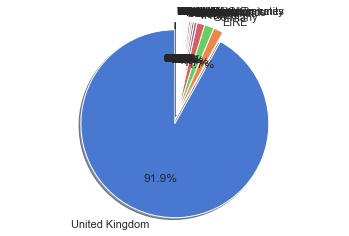

In [158]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = dataset['Country'].value_counts().index
country_sales = []
for i in labels:
    x = dataset[dataset['Country'] == i]
    country_sales.append(len(x))
#     country_custnull.append(len(x[x['Customer ID'].isnull()]))
# sizes = [15, 30, 45, 10]
explode = [0.1]
explode.extend([0]*(len(labels)-1))

fig1, ax1 = plt.subplots()
ax1.pie(country_sales, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

It is clear that Majority of the sales took place in United Kingdom. Uk has contributed to 92% of sales relatively higher than remaining 42 countries

# Comparing sales without Customer id to total sales for each country with the help of bar plot

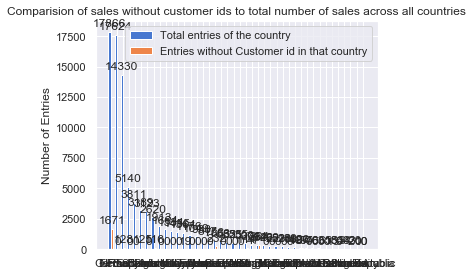

In [136]:
## unique country names
labels = dataset['Country'].value_counts().index[1:]

country_num = []
country_custnull = []
for i in countries:
    x = dataset[dataset['Country'] == i]
    country_num.append(len(x))
    country_custnull.append(len(x[x['Customer ID'].isnull()]))
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, country_num[1:], width, label='Total entries of the country')
rects2 = ax.bar(x + width/2, country_custnull[1:], width, label='Entries without Customer id in that country')
ax.set_ylabel('Number of Entries')
ax.set_title('Comparision of sales without customer ids to total number of sales across all countries')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

# Comparing Number of sales without Customer id to Total number of sales in UK

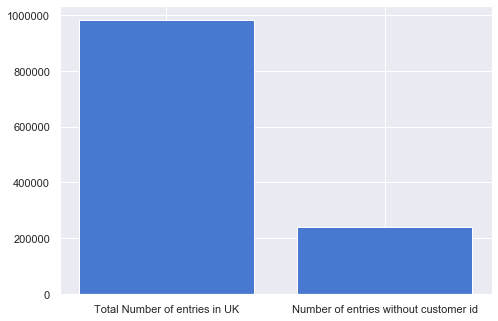

In [144]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Total Number of entries in UK', 'Number of entries without customer id']
country = [country_num[0],country_custnull[0]]
ax.bar(langs,country)
plt.show()

We can see that sales in UK are comparitively high than other countries and Sales without Customer id are more than 20 % of total sales

# Visualizing Quantities across all entries

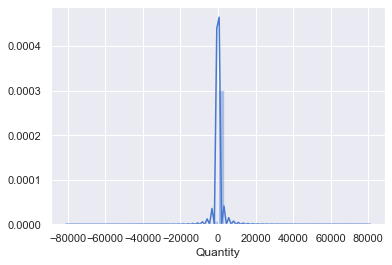

In [103]:
sns.set(color_codes=True)
sns.set_palette(sns.color_palette("muted"))

sns.distplot(dataset["Quantity"].dropna());

We can observe that, though quantities are spread throughout a larger range, most of them are around 0 with very very low variance

# Visualizing Prices across all entries

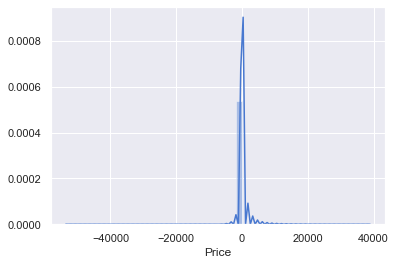

In [70]:
sns.set(color_codes=True)
sns.set_palette(sns.color_palette("muted"))

sns.distplot(dataset["Price"].dropna());

Similar to quantity it can observed that, though prices are spread throughout a larger range, most of them are just above 0 with very very low variance and from the stats we can see that there are only 5 negative price values

# A3 & A4 :

# InvoiceYear has been extracted from the InvoiceDate

In [25]:
dataset['InvoiceYear'] = pd.DatetimeIndex(dataset['InvoiceDate']).year

# InvoiceMonth has been extracted from the InvoiceDate

In [26]:
dataset['InvoiceMonth'] = pd.DatetimeIndex(dataset['InvoiceDate']).month

# Assigning Month to InvoiceMonth

In [27]:
month = {1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"}
dataset['InvoiceMonth'] = dataset['InvoiceMonth'].apply(lambda x: month[x])

In [28]:
dataset

Invoice StockCode                          Description  Quantity  \
0        489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1        489434    79323P                   PINK CHERRY LIGHTS        12   
2        489434    79323W                  WHITE CHERRY LIGHTS        12   
3        489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4        489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...         ...       ...                                  ...       ...   
1067366  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
1067367  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
1067368  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
1067369  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
1067370  581587      POST                              POSTAGE         1   

                InvoiceDate  Price  Customer ID         Country  InvoiceYear  \
0       2009-12-01 07:45:00   6.95      13085.0  United Kingdom         2009   
1       2009-12-01 07:45:00   6.75      13085.0  United Kingdom         2009   
2       2009-12-01 07:45:00   6.75      13085.0  United Kingdom         2009   
3       2009-12-01 07:45:00   2.10      13085.0  United Kingdom         2009   
4       2009-12-01 07:45:00   1.25      13085.0  United Kingdom         2009   
...                     ...    ...          ...             ...          ...   
1067366 2011-12-09 12:50:00   2.10      12680.0          France         2011   
1067367 2011-12-09 12:50:00   4.15      12680.0          France         2011   
1067368 2011-12-09 12:50:00   4.15      12680.0          France         2011   
1067369 2011-12-09 12:50:00   4.95      12680.0          France         2011   
1067370 2011-12-09 12:50:00  18.00      12680.0          France         2011   

        InvoiceMonth  
0           December  
1           December  
2           December  
3           December  
4           December  
...              ...  
1067366     December  
1067367     December  
1067368     December  
1067369     December  
1067370     December  

[1067371 rows x 10 columns]

# Dataset has been grouped based on StockCode,InvoiceYear,InvoiceMonth and other summarized attributes along with aggregated unique number of Customers and prices per group are extracted and stored in new summarised dataset

In [29]:
summarised_dataset1 = dataset.groupby(['StockCode','InvoiceYear','InvoiceMonth'],as_index=False).agg({"Invoice":"nunique","Description":"nunique"})
summarised_dataset2 = dataset.groupby(['StockCode','InvoiceYear','InvoiceMonth'],as_index=False).agg({"Description":"first","Quantity":"mean","Price":"median"})
summarised_dataset3 = dataset.groupby(['StockCode','InvoiceYear','InvoiceMonth'],as_index=False).agg(min_quantity = ("Quantity",min),max_quantity = ("Quantity",max),sum_quantity = ("Quantity",sum))
summarised_dataset4 = dataset.groupby(['StockCode','InvoiceYear','InvoiceMonth'],as_index=False).agg({"Country":"nunique"})
summarised_dataset5 = dataset.groupby(['StockCode','InvoiceYear','InvoiceMonth'],as_index=False).agg({"Country":"unique","Customer ID":"nunique","Price":"nunique"})
temp = pd.merge(summarised_dataset1,summarised_dataset2,how = 'inner',on =['StockCode','InvoiceYear','InvoiceMonth']).join(summarised_dataset3)
temp = pd.merge(temp,summarised_dataset4,how = 'inner',on =['StockCode','InvoiceYear','InvoiceMonth'])
summarised_dataset = pd.merge(temp,summarised_dataset5,how = 'inner',on =['StockCode','InvoiceYear','InvoiceMonth'])
summarised_dataset.columns = ['StockCode','InvoiceYear','InvoiceMonth','unique_invoice_counts','unique_descriptions',
                              'Description','Average_Quantity','Price_median','min_quantity','max_quantity','sum_quantity',
                              'unique_number_of_countries','List_of_countries','unique_customers_count','unique_prices_count']

summarised_dataset                                                                    

StockCode  InvoiceYear InvoiceMonth  unique_invoice_counts  \
0             10002         2009     December                     20   
1             10002         2010        April                     25   
2             10002         2010       August                     24   
3             10002         2010     December                     30   
4             10002         2010     February                     15   
...             ...          ...          ...                    ...   
68915  gift_0001_90         2010      January                      1   
68916             m         2010        April                      1   
68917             m         2010     December                      1   
68918             m         2010     February                      1   
68919             m         2010         June                      1   

       unique_descriptions                  Description  Average_Quantity  \
0                        1  INFLATABLE POLITICAL GLOBE          10.285714   
1                        1  INFLATABLE POLITICAL GLOBE          37.280000   
2                        1  INFLATABLE POLITICAL GLOBE          23.916667   
3                        1  INFLATABLE POLITICAL GLOBE           8.387755   
4                        1  INFLATABLE POLITICAL GLOBE          17.133333   
...                    ...                          ...               ...   
68915                    0                          NaN          2.000000   
68916                    1                       Manual          1.000000   
68917                    1                       Manual          1.000000   
68918                    1                       Manual          1.000000   
68919                    1                       Manual          1.000000   

       Price_median  min_quantity  max_quantity  sum_quantity  \
0             0.850             1            48           216   
1             0.850          -200           300           932   
2             0.850           -12           200           574   
3             0.850             1            48           411   
4             0.850             1           100           257   
...             ...           ...           ...           ...   
68915         0.000             2             2             2   
68916         4.000             1             1             1   
68917         2.550             1             1             1   
68918         2.975             1             1             2   
68919         2.550             1             1             1   

       unique_number_of_countries                           List_of_countries  \
0                               3             [United Kingdom, Spain, France]   
1                               4  [France, United Kingdom, Denmark, Germany]   
2                               2                    [United Kingdom, France]   
3                               3              [France, United Kingdom, EIRE]   
4                               4     [United Kingdom, France, Germany, EIRE]   
...                           ...                                         ...   
68915                           1                            [United Kingdom]   
68916                           1                            [United Kingdom]   
68917                           1                            [United Kingdom]   
68918                           1                            [United Kingdom]   
68919                           1                            [United Kingdom]   

       unique_customers_count  unique_prices_count  
0                          16                    2  
1                          21                    3  
2                          18                    3  
3                          15                    2  
4                          12                    2  
...                       ...                  ...  
68915                       0                    1  
68916                       0             

# maxquant_dataset dataframe has been created with maximum quantity per group

In [30]:
maxquant_dataset = dataset.groupby(['StockCode','InvoiceYear','InvoiceMonth'],as_index=False).agg({"Quantity":"max"})
maxquant_dataset


StockCode  InvoiceYear InvoiceMonth  Quantity
0             10002         2009     December        48
1             10002         2010        April       300
2             10002         2010       August       200
3             10002         2010     December        48
4             10002         2010     February       100
...             ...          ...          ...       ...
68915  gift_0001_90         2010      January         2
68916             m         2010        April         1
68917             m         2010     December         1
68918             m         2010     February         1
68919             m         2010         June         1

[68920 rows x 4 columns]

# Merging maxquant_dataset with dataset to extract minimum customer id for the highest quantity

In [31]:
maxquant_mincust_dataset = pd.merge(maxquant_dataset,dataset,how = 'left', on =['StockCode','InvoiceYear','InvoiceMonth','Quantity']).groupby(['StockCode','InvoiceYear','InvoiceMonth'],as_index = False).agg({"Customer ID":"min"})
maxquant_mincust_dataset.columns = ['StockCode','InvoiceYear','InvoiceMonth','Customer_id_of_highest_quantity']
maxquant_mincust_dataset


StockCode  InvoiceYear InvoiceMonth  Customer_id_of_highest_quantity
0             10002         2009     December                          12510.0
1             10002         2010        April                          12931.0
2             10002         2010       August                          12931.0
3             10002         2010     December                          12583.0
4             10002         2010     February                          12931.0
...             ...          ...          ...                              ...
68915  gift_0001_90         2010      January                              NaN
68916             m         2010        April                              NaN
68917             m         2010     December                              NaN
68918             m         2010     February                              NaN
68919             m         2010         June                              NaN

[68920 rows x 4 columns]

# Defining a fucntion which returns number of times a value in price changes in each group of a grouped dataframe

In [32]:
def pricechange(x):
    vec = x['Price'].to_numpy()
    chnge = vec[1:] - vec[:-1]
    x['price_change_counts'] = np.count_nonzero(chnge)
    return x

# Number of price changes has been extracted for each group of the grouped dataset

In [33]:
pricechange_dataset = dataset.groupby(['StockCode','InvoiceYear','InvoiceMonth'],as_index=False).apply(pricechange).groupby(['StockCode','InvoiceYear','InvoiceMonth'],as_index=False).agg({"price_change_counts":"mean"})
pricechange_dataset.columns = ['StockCode','InvoiceYear','InvoiceMonth','Number_price_changes_in_group']
pricechange_dataset



StockCode  InvoiceYear InvoiceMonth  Number_price_changes_in_group
0             10002         2009     December                              6
1             10002         2010        April                             11
2             10002         2010       August                             12
3             10002         2010     December                             19
4             10002         2010     February                              4
...             ...          ...          ...                            ...
68915  gift_0001_90         2010      January                              0
68916             m         2010        April                              0
68917             m         2010     December                              0
68918             m         2010     February                              1
68919             m         2010         June                              0

[68920 rows x 4 columns]

# Defining a fucntion which returns Amount (price*quantity) for each entry of a dataframe

In [34]:
def amount(x):
    x['amount'] = x['Price']*x['Quantity']
    return x

# Defining a fucntion which returns weighted average of the price (using quantity) in each group of a grouped dataframe

In [35]:
def weightedaverage(x):
    if x['Quantity'].sum() == 0: ## filtering the groups which has quantities summing up to 0 which results in NaN 
        x['weighted_average'] = 0  ## assiging its weigthed average as 0
    else :
        x['weighted_average'] = (x['amount']/(x['Quantity'].sum())).sum()
#     x['weighted_average'] = ((x['Price']*x['Quantity'])/(x['Quantity'].sum())).sum()
    return x

# Computed amount has been added as a column to the main dataset

In [36]:
dataset = dataset.groupby(['StockCode','InvoiceYear','InvoiceMonth'],as_index=False).apply(amount)
dataset

Invoice StockCode                          Description  Quantity  \
0        489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1        489434    79323P                   PINK CHERRY LIGHTS        12   
2        489434    79323W                  WHITE CHERRY LIGHTS        12   
3        489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4        489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...         ...       ...                                  ...       ...   
1067366  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
1067367  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
1067368  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
1067369  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
1067370  581587      POST                              POSTAGE         1   

                InvoiceDate  Price  Customer ID         Country  InvoiceYear  \
0       2009-12-01 07:45:00   6.95      13085.0  United Kingdom         2009   
1       2009-12-01 07:45:00   6.75      13085.0  United Kingdom         2009   
2       2009-12-01 07:45:00   6.75      13085.0  United Kingdom         2009   
3       2009-12-01 07:45:00   2.10      13085.0  United Kingdom         2009   
4       2009-12-01 07:45:00   1.25      13085.0  United Kingdom         2009   
...                     ...    ...          ...             ...          ...   
1067366 2011-12-09 12:50:00   2.10      12680.0          France         2011   
1067367 2011-12-09 12:50:00   4.15      12680.0          France         2011   
1067368 2011-12-09 12:50:00   4.15      12680.0          France         2011   
1067369 2011-12-09 12:50:00   4.95      12680.0          France         2011   
1067370 2011-12-09 12:50:00  18.00      12680.0          France         2011   

        InvoiceMonth  amount  
0           December   83.40  
1           December   81.00  
2           December   81.00  
3           December  100.80  
4           December   30.00  
...              ...     ...  
1067366     December   12.60  
1067367     December   16.60  
1067368     December   16.60  
1067369     December   14.85  
1067370     December   18.00  

[1067371 rows x 11 columns]

# Weighted average of the price of a particular group for grouped dataset has been added to main dataset

In [37]:
dataset = dataset.groupby(['StockCode','InvoiceYear','InvoiceMonth'],as_index=False).apply(weightedaverage)
dataset


Invoice StockCode                          Description  Quantity  \
0        489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1        489434    79323P                   PINK CHERRY LIGHTS        12   
2        489434    79323W                  WHITE CHERRY LIGHTS        12   
3        489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4        489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...         ...       ...                                  ...       ...   
1067366  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
1067367  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
1067368  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
1067369  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
1067370  581587      POST                              POSTAGE         1   

                InvoiceDate  Price  Customer ID         Country  InvoiceYear  \
0       2009-12-01 07:45:00   6.95      13085.0  United Kingdom         2009   
1       2009-12-01 07:45:00   6.75      13085.0  United Kingdom         2009   
2       2009-12-01 07:45:00   6.75      13085.0  United Kingdom         2009   
3       2009-12-01 07:45:00   2.10      13085.0  United Kingdom         2009   
4       2009-12-01 07:45:00   1.25      13085.0  United Kingdom         2009   
...                     ...    ...          ...             ...          ...   
1067366 2011-12-09 12:50:00   2.10      12680.0          France         2011   
1067367 2011-12-09 12:50:00   4.15      12680.0          France         2011   
1067368 2011-12-09 12:50:00   4.15      12680.0          France         2011   
1067369 2011-12-09 12:50:00   4.95      12680.0          France         2011   
1067370 2011-12-09 12:50:00  18.00      12680.0          France         2011   

        InvoiceMonth  amount  weighted_average  
0           December   83.40          8.820732  
1           December   81.00          6.131372  
2           December   81.00          5.966623  
3           December  100.80          2.183589  
4           December   30.00          1.295394  
...              ...     ...               ...  
1067366     December   12.60          2.156569  
1067367     December   16.60          4.268286  
1067368     December   16.60          4.150000  
1067369     December   14.85          4.881756  
1067370     December   18.00         22.481885  

[1067371 rows x 12 columns]

# Grouping dataset to extract weighted average of price per group

In [38]:
wa_price_dataset = dataset.groupby(['StockCode','InvoiceYear','InvoiceMonth'],as_index=False).agg({"weighted_average":"mean"})
wa_price_dataset.columns = ['StockCode','InvoiceYear','InvoiceMonth','Weighted_average_of_price']
wa_price_dataset


StockCode  InvoiceYear InvoiceMonth  Weighted_average_of_price
0             10002         2009     December                   0.861806
1             10002         2010        April                   0.750783
2             10002         2010       August                   0.766463
3             10002         2010     December                   0.938686
4             10002         2010     February                   0.856304
...             ...          ...          ...                        ...
68915  gift_0001_90         2010      January                   0.000000
68916             m         2010        April                   4.000000
68917             m         2010     December                   2.550000
68918             m         2010     February                   2.975000
68919             m         2010         June                   2.550000

[68920 rows x 4 columns]

# Pulling a subset of dataset which has price greater than weighted average price

In [39]:
abve_wa_price_dataset = dataset[dataset['Price'] >= dataset['weighted_average']]
abve_wa_price_dataset

Invoice StockCode                      Description  Quantity  \
1        489434    79323P               PINK CHERRY LIGHTS        12   
2        489434    79323W              WHITE CHERRY LIGHTS        12   
8        489435     22350                        CAT BOWL         12   
15       489436     84879    ASSORTED COLOUR BIRD ORNAMENT        16   
17       489436     22142     CHRISTMAS CRAFT WHITE FAIRY         12   
...         ...       ...                              ...       ...   
1067342  581585     16016      LARGE CHINESE STYLE SCISSOR        10   
1067359  581587     22727        ALARM CLOCK BAKELIKE RED          4   
1067363  581587     22629              SPACEBOY LUNCH BOX         12   
1067368  581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
1067369  581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

                InvoiceDate  Price  Customer ID         Country  InvoiceYear  \
1       2009-12-01 07:45:00   6.75      13085.0  United Kingdom         2009   
2       2009-12-01 07:45:00   6.75      13085.0  United Kingdom         2009   
8       2009-12-01 07:46:00   2.55      13085.0  United Kingdom         2009   
15      2009-12-01 09:06:00   1.69      13078.0  United Kingdom         2009   
17      2009-12-01 09:06:00   1.45      13078.0  United Kingdom         2009   
...                     ...    ...          ...             ...          ...   
1067342 2011-12-09 12:31:00   0.85      15804.0  United Kingdom         2011   
1067359 2011-12-09 12:50:00   3.75      12680.0          France         2011   
1067363 2011-12-09 12:50:00   1.95      12680.0          France         2011   
1067368 2011-12-09 12:50:00   4.15      12680.0          France         2011   
1067369 2011-12-09 12:50:00   4.95      12680.0          France         2011   

        InvoiceMonth  amount  weighted_average  
1           December   81.00          6.131372  
2           December   81.00          5.966623  
8           December   30.60          2.446618  
15          December   27.04          1.642298  
17          December   17.40          1.424795  
...              ...     ...               ...  
1067342     December    8.50          0.850000  
1067359     December   15.00          3.598491  
1067363     December   23.40          1.837576  
1067368     December   16.60          4.150000  
1067369     December   14.85          4.881756  

[574326 rows x 12 columns]

# Pulling a subset of dataset which has price less than weighted average price

In [40]:
blw_wa_price_dataset = dataset[dataset['Price'] < dataset['weighted_average']]
blw_wa_price_dataset

Invoice StockCode                          Description  Quantity  \
0        489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
3        489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4        489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
5        489434     22064           PINK DOUGHNUT TRINKET POT         24   
6        489434     21871                  SAVE THE PLANET MUG        24   
...         ...       ...                                  ...       ...   
1067364  581587     23256          CHILDRENS CUTLERY SPACEBOY          4   
1067365  581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
1067366  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
1067367  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
1067370  581587      POST                              POSTAGE         1   

                InvoiceDate  Price  Customer ID         Country  InvoiceYear  \
0       2009-12-01 07:45:00   6.95      13085.0  United Kingdom         2009   
3       2009-12-01 07:45:00   2.10      13085.0  United Kingdom         2009   
4       2009-12-01 07:45:00   1.25      13085.0  United Kingdom         2009   
5       2009-12-01 07:45:00   1.65      13085.0  United Kingdom         2009   
6       2009-12-01 07:45:00   1.25      13085.0  United Kingdom         2009   
...                     ...    ...          ...             ...          ...   
1067364 2011-12-09 12:50:00   4.15      12680.0          France         2011   
1067365 2011-12-09 12:50:00   0.85      12680.0          France         2011   
1067366 2011-12-09 12:50:00   2.10      12680.0          France         2011   
1067367 2011-12-09 12:50:00   4.15      12680.0          France         2011   
1067370 2011-12-09 12:50:00  18.00      12680.0          France         2011   

        InvoiceMonth  amount  weighted_average  
0           December    83.4          8.820732  
3           December   100.8          2.183589  
4           December    30.0          1.295394  
5           December    39.6          1.779717  
6           December    30.0          1.381337  
...              ...     ...               ...  
1067364     December    16.6          4.186303  
1067365     December    10.2          0.868571  
1067366     December    12.6          2.156569  
1067367     December    16.6          4.268286  
1067370     December    18.0         22.481885  

[493045 rows x 12 columns]

# Amount below weighted average price for every group is computed and stored in modified dataset

In [41]:
blw_wa_price_dataset = blw_wa_price_dataset.groupby(['StockCode','InvoiceYear','InvoiceMonth'],as_index=False).agg({"amount" : "sum"})
blw_wa_price_dataset

StockCode  InvoiceYear InvoiceMonth  amount
0             10002         2009     December  181.05
1             10002         2010        April  525.60
2             10002         2010       August  288.00
3             10002         2010     December  311.10
4             10002         2010     February  216.75
...             ...          ...          ...     ...
44542  gift_0001_30         2010      January    0.00
44543  gift_0001_30         2011       August    0.00
44544  gift_0001_40         2010       August    0.00
44545  gift_0001_80         2009     December    0.00
44546             m         2010     February    2.55

[44547 rows x 4 columns]

# Amount above weighted average price for every group is computed and stored in modified dataset

In [42]:
abve_wa_price_dataset = abve_wa_price_dataset.groupby(['StockCode','InvoiceYear','InvoiceMonth'],as_index=False).agg({"amount" : "sum"})
abve_wa_price_dataset

StockCode  InvoiceYear InvoiceMonth  amount
0             10002         2009     December    5.10
1             10002         2010        April  174.13
2             10002         2010       August  151.95
3             10002         2010     December   74.70
4             10002         2010     February    3.32
...             ...          ...          ...     ...
65995  gift_0001_90         2010      January    0.00
65996             m         2010        April    4.00
65997             m         2010     December    2.55
65998             m         2010     February    3.40
65999             m         2010         June    2.55

[66000 rows x 4 columns]

# Both modified datasets are merged with outer join to make sure no groups are ignored

In [43]:
merged_amount_dataset = pd.merge(blw_wa_price_dataset,abve_wa_price_dataset,how = 'outer', on =['StockCode','InvoiceYear','InvoiceMonth'])
merged_amount_dataset


StockCode  InvoiceYear InvoiceMonth  amount_x  amount_y
0             10002         2009     December    181.05      5.10
1             10002         2010        April    525.60    174.13
2             10002         2010       August    288.00    151.95
3             10002         2010     December    311.10     74.70
4             10002         2010     February    216.75      3.32
...             ...          ...          ...       ...       ...
68915  gift_0001_90         2010       August       NaN      0.00
68916  gift_0001_90         2010      January       NaN      0.00
68917             m         2010        April       NaN      4.00
68918             m         2010     December       NaN      2.55
68919             m         2010         June       NaN      2.55

[68920 rows x 5 columns]

# Imputing 0's in place of NaN (which are formed due to merge)

In [44]:
merged_amount_dataset = merged_amount_dataset.fillna(0)
merged_amount_dataset.columns = ['StockCode','InvoiceYear','InvoiceMonth','Amount_below_WA_price','Amount_above_WA_price']
merged_amount_dataset

StockCode  InvoiceYear InvoiceMonth  Amount_below_WA_price  \
0             10002         2009     December                 181.05   
1             10002         2010        April                 525.60   
2             10002         2010       August                 288.00   
3             10002         2010     December                 311.10   
4             10002         2010     February                 216.75   
...             ...          ...          ...                    ...   
68915  gift_0001_90         2010       August                   0.00   
68916  gift_0001_90         2010      January                   0.00   
68917             m         2010        April                   0.00   
68918             m         2010     December                   0.00   
68919             m         2010         June                   0.00   

       Amount_above_WA_price  
0                       5.10  
1                     174.13  
2                     151.95  
3                      74.70  
4                       3.32  
...                      ...  
68915                   0.00  
68916                   0.00  
68917                   4.00  
68918                   2.55  
68919                   2.55  

[68920 rows x 5 columns]

## Merging all datasets to form desired dataset

In [45]:
# summarised_dataset,maxquant_mincust_dataset,pricechange_dataset,wa_price_dataset,merged_amount_dataset
summarised_dataset = pd.merge(summarised_dataset,maxquant_mincust_dataset,how = 'inner', on =['StockCode','InvoiceYear','InvoiceMonth'])
summarised_dataset = pd.merge(summarised_dataset,pricechange_dataset,how = 'inner', on =['StockCode','InvoiceYear','InvoiceMonth'])
summarised_dataset = pd.merge(summarised_dataset,wa_price_dataset,how = 'inner', on =['StockCode','InvoiceYear','InvoiceMonth'])
summarised_dataset = pd.merge(summarised_dataset,merged_amount_dataset,how = 'inner', on =['StockCode','InvoiceYear','InvoiceMonth'])
# summarised_dataset.columns = ['StockCode','InvoiceYear','InvoiceMonth','unique_customers','unique_prices','Customerid_of_highest_quantity','Number_price_changes_in_group','Weighted_average_of_price','Amount_below_WA_price','Amount_above_WA_price']
summarised_dataset

StockCode  InvoiceYear InvoiceMonth  unique_invoice_counts  \
0             10002         2009     December                     20   
1             10002         2010        April                     25   
2             10002         2010       August                     24   
3             10002         2010     December                     30   
4             10002         2010     February                     15   
...             ...          ...          ...                    ...   
68915  gift_0001_90         2010      January                      1   
68916             m         2010        April                      1   
68917             m         2010     December                      1   
68918             m         2010     February                      1   
68919             m         2010         June                      1   

       unique_descriptions                  Description  Average_Quantity  \
0                        1  INFLATABLE POLITICAL GLOBE          10.285714   
1                        1  INFLATABLE POLITICAL GLOBE          37.280000   
2                        1  INFLATABLE POLITICAL GLOBE          23.916667   
3                        1  INFLATABLE POLITICAL GLOBE           8.387755   
4                        1  INFLATABLE POLITICAL GLOBE          17.133333   
...                    ...                          ...               ...   
68915                    0                          NaN          2.000000   
68916                    1                       Manual          1.000000   
68917                    1                       Manual          1.000000   
68918                    1                       Manual          1.000000   
68919                    1                       Manual          1.000000   

       Price_median  min_quantity  max_quantity  sum_quantity  \
0             0.850             1            48           216   
1             0.850          -200           300           932   
2             0.850           -12           200           574   
3             0.850             1            48           411   
4             0.850             1           100           257   
...             ...           ...           ...           ...   
68915         0.000             2             2             2   
68916         4.000             1             1             1   
68917         2.550             1             1             1   
68918         2.975             1             1             2   
68919         2.550             1             1             1   

       unique_number_of_countries                           List_of_countries  \
0                               3             [United Kingdom, Spain, France]   
1                               4  [France, United Kingdom, Denmark, Germany]   
2                               2                    [United Kingdom, France]   
3                               3              [France, United Kingdom, EIRE]   
4                               4     [United Kingdom, France, Germany, EIRE]   
...                           ...                                         ...   
68915                           1                            [United Kingdom]   
68916                           1                            [United Kingdom]   
68917                           1                            [United Kingdom]   
68918                           1                            [United Kingdom]   
68919                           1                            [United Kingdom]   

       unique_customers_count  unique_prices_count  \
0                          16                    2   
1                          21                    3   
2                          18                    3   
3                          15                    2   
4                          12                    2   
...                       ...                  ...   
68915                       0                    1   
68916                       0     

# summarised dataframe is exported to a csv file (with pipe delimited)

In [ ]:
summarised_dataset.to_csv('A4:Summarised_Dataset.csv',sep = '|' , index=False)

# A5 : Visualizations and Bullet points about summarised dataset

# Piechart to look at relation between descriptions for its groups

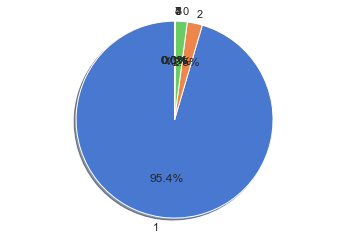

In [163]:
import matplotlib.pyplot as plt

labels = summarised_dataset['unique_descriptions'].value_counts().index
country_sales = []
for i in labels:
    x = summarised_dataset[summarised_dataset['unique_descriptions'] == i]
    country_sales.append(len(x))
#     country_custnull.append(len(x[x['Customer ID'].isnull()]))
# sizes = [15, 30, 45, 10]
# explode = [0.1]
# explode.extend([0]*(len(labels)-1))

fig1, ax1 = plt.subplots()
ax1.pie(country_sales, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

We can see that 96% of groups have only one decription. It is clear that Description and StockCode have one to one correspondance

# Bar plot to compare Unique Customer count variation across all months

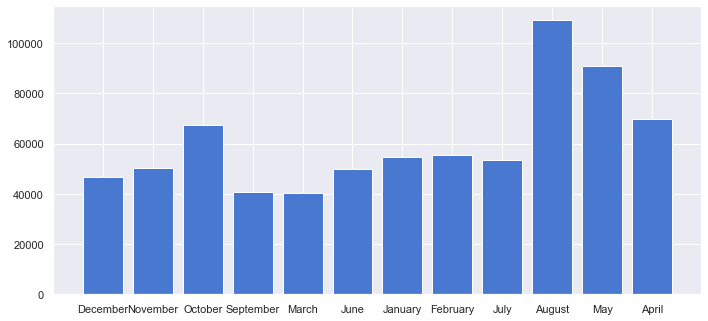

In [187]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1])
months = summarised_dataset['InvoiceMonth'].value_counts().index
unique_cust_counts = summarised_dataset.groupby(['InvoiceMonth'],as_index=False).agg({'unique_customers_count':'sum'})['unique_customers_count']
ax.bar(months,unique_cust_counts)
plt.show()

It can observed that unique number of customer count in August and May are relatively higher than remaining months

# Bar plot to compare Number of times price changed across all months

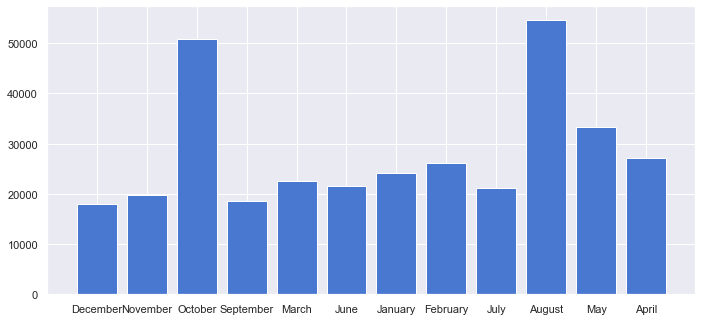

In [186]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1])
months = summarised_dataset['InvoiceMonth'].value_counts().index
pric_change = summarised_dataset.groupby(['InvoiceMonth'],as_index=False).agg({'Number_price_changes_in_group':'sum'})['Number_price_changes_in_group']
ax.bar(months,pric_change)
plt.show()

It can observed that Number of times price changed with in a month across all groups is high in August and October are more than double than many months and relatively higher than all months.

# Pie chart to visualize minimum quantity across all groups

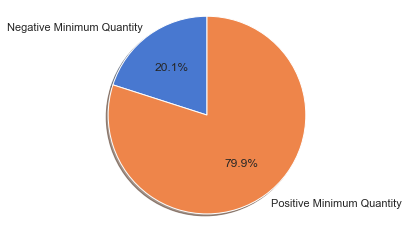

In [177]:
import matplotlib.pyplot as plt

labels = ['Negative Minimum Quantity','Positive Minimum Quantity']
sizes = [len(summarised_dataset[summarised_dataset['min_quantity']<0]),len(summarised_dataset[summarised_dataset['min_quantity']>0])]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

We can see that 80% of groups have minimum quantity more than zero

# Piechart to visualize the comparision between biggest of amount above and  below weighted average of price across all groups

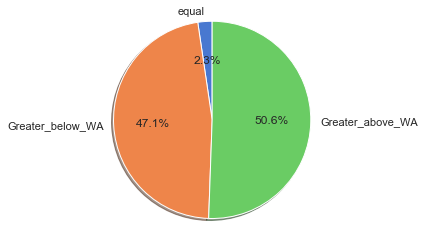

In [168]:
equal = len(summarised_dataset[summarised_dataset['Amount_below_WA_price'] == summarised_dataset['Amount_above_WA_price']])
Greater_below_WA = len(summarised_dataset[summarised_dataset['Amount_below_WA_price'] > summarised_dataset['Amount_above_WA_price']])
Greater_above_WA = len(summarised_dataset[summarised_dataset['Amount_below_WA_price'] < summarised_dataset['Amount_above_WA_price']])

import matplotlib.pyplot as plt

labels = ['equal','Greater_below_WA','Greater_above_WA']
sizes = [equal,Greater_below_WA,Greater_above_WA]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


We can see that there are contributing equally.

# Bar plot of Average quantity across all groups

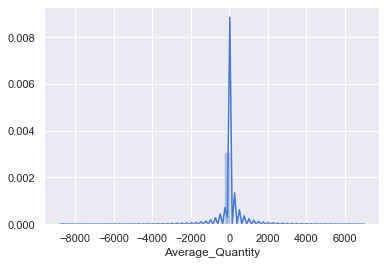

In [164]:
sns.set(color_codes=True)
sns.set_palette(sns.color_palette("muted"))

sns.distplot(summarised_dataset["Average_Quantity"].dropna());

Though average quantity ranged across -8500 to 6500, majority of the groups have average quantities from -200 to 200.

# Barplot to visualize spread of number of countries per group

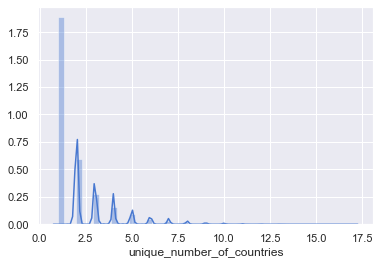

In [160]:
sns.set(color_codes=True)
sns.set_palette(sns.color_palette("muted"))

sns.distplot(summarised_dataset["unique_number_of_countries"].dropna());

we can see though there are 43 distinct countries, many groups have no more than 4 countries

# Insights which interested me from summarised dataset are :

* Description has one to one correspondance with stock code and there were very few instances description has been changed over time.
* Number of unique price values per group are directly proportional to number of distinct countries in that group. In most cases, if a group has only one country then price remained stable.
* All the groups which does not have any customer ids have there sales related to United Kingdom
* It can observed that Number of times price changed with in a month across all groups is high in August and October are more than double than many months and relatively higher than all months.
* It can observed that unique number of customer count in August and May are relatively higher than remaining months.
* Almost 80% of minimum quantities across the groups are positive through which it can be assumed that this online retail store is manufacturing most of the products by itslef rather than buying from other vendors.

# A6 : Dataset has been grouped based on keywords and stored into a modified dataset

# Descriptions are stored into a list

In [50]:
# number_records_with_no_desc = len(dataset[dataset['Description'].isnull()])
# docs = dataset[dataset['Description'].notnull()]['Description']
# docs = docs.apply(lambda x:pre_process(x))
docs = dataset['Description']
docs = docs.to_list()
docs

['15CM CHRISTMAS GLASS BALL 20 LIGHTS',
 'PINK CHERRY LIGHTS',
 ' WHITE CHERRY LIGHTS',
 'RECORD FRAME 7" SINGLE SIZE ',
 'STRAWBERRY CERAMIC TRINKET BOX',
 'PINK DOUGHNUT TRINKET POT ',
 'SAVE THE PLANET MUG',
 'FANCY FONT HOME SWEET HOME DOORMAT',
 'CAT BOWL ',
 'DOG BOWL , CHASING BALL DESIGN',
 'HEART MEASURING SPOONS LARGE',
 'LUNCHBOX WITH CUTLERY FAIRY CAKES ',
 'DOOR MAT BLACK FLOCK ',
 'LOVE BUILDING BLOCK WORD',
 'HOME BUILDING BLOCK WORD',
 'ASSORTED COLOUR BIRD ORNAMENT',
 ' PEACE WOODEN BLOCK LETTERS',
 'CHRISTMAS CRAFT WHITE FAIRY ',
 'HEART IVORY TRELLIS LARGE',
 'HEART FILIGREE DOVE LARGE',
 'FULL ENGLISH BREAKFAST PLATE',
 'PIZZA PLATE IN BOX',
 'BLACK DINER WALL CLOCK',
 'SET OF 3 BLACK FLYING DUCKS',
 'AREA PATROLLED METAL SIGN',
 'PLEASE ONE PERSON  METAL SIGN',
 'BATH BUILDING BLOCK WORD',
 'CLASSIC WHITE FRAME',
 'SMALL MARSHMALLOWS PINK BOWL',
 'BISCUITS SMALL BOWL LIGHT BLUE',
 'SCOTTIE DOG HOT WATER BOTTLE',
 'CHRISTMAS CRAFT HEART DECORATIONS',
 'CHRISTMAS CRA

# Keyword list has been created and loaded into a numpy array

In [51]:
nouns = pd.read_csv("keywords.txt")
nouns = nouns.to_numpy()
nouns = nouns[:,0]
nouns

array(['CD', 'SUV', 'TV', ..., 'garland', 'warmer', 'ribbons'],
      dtype=object)

# words from description and its corresponding index in stored in a list

In [52]:
words = []
docs = [str(i).split() for i in docs]
docs = [list(zip(docs[i],[i]*len(docs[i]))) for i in range(len(docs))]
[words.extend(i) for i in docs]

words

[('15CM', 0),
 ('CHRISTMAS', 0),
 ('GLASS', 0),
 ('BALL', 0),
 ('20', 0),
 ('LIGHTS', 0),
 ('PINK', 1),
 ('CHERRY', 1),
 ('LIGHTS', 1),
 ('WHITE', 2),
 ('CHERRY', 2),
 ('LIGHTS', 2),
 ('RECORD', 3),
 ('FRAME', 3),
 ('7"', 3),
 ('SINGLE', 3),
 ('SIZE', 3),
 ('STRAWBERRY', 4),
 ('CERAMIC', 4),
 ('TRINKET', 4),
 ('BOX', 4),
 ('PINK', 5),
 ('DOUGHNUT', 5),
 ('TRINKET', 5),
 ('POT', 5),
 ('SAVE', 6),
 ('THE', 6),
 ('PLANET', 6),
 ('MUG', 6),
 ('FANCY', 7),
 ('FONT', 7),
 ('HOME', 7),
 ('SWEET', 7),
 ('HOME', 7),
 ('DOORMAT', 7),
 ('CAT', 8),
 ('BOWL', 8),
 ('DOG', 9),
 ('BOWL', 9),
 (',', 9),
 ('CHASING', 9),
 ('BALL', 9),
 ('DESIGN', 9),
 ('HEART', 10),
 ('MEASURING', 10),
 ('SPOONS', 10),
 ('LARGE', 10),
 ('LUNCHBOX', 11),
 ('WITH', 11),
 ('CUTLERY', 11),
 ('FAIRY', 11),
 ('CAKES', 11),
 ('DOOR', 12),
 ('MAT', 12),
 ('BLACK', 12),
 ('FLOCK', 12),
 ('LOVE', 13),
 ('BUILDING', 13),
 ('BLOCK', 13),
 ('WORD', 13),
 ('HOME', 14),
 ('BUILDING', 14),
 ('BLOCK', 14),
 ('WORD', 14),
 ('ASSORTED', 

# Dictionary with keywords in description and its occurence(row indices) has been created

In [53]:
nouns = [i.lower() for i in nouns]
freq_dict = {}
for i in words:
    if i[0].lower() in nouns:
        if i[0] in freq_dict.keys():
            freq_dict[i[0]][0].append(i[1])
            freq_dict[i[0]][1] = len(freq_dict[i[0]][0])
            
        else :
            freq_dict.update({i[0]:[[i[1]],1]})
freq_dict


{'LIGHTS': [[0,
   1,
   2,
   209,
   214,
   218,
   221,
   280,
   331,
   400,
   418,
   428,
   515,
   571,
   572,
   573,
   626,
   680,
   939,
   1134,
   1162,
   1256,
   1332,
   1399,
   1427,
   1435,
   1672,
   1734,
   1735,
   1761,
   1762,
   1793,
   1802,
   1803,
   1826,
   2258,
   2329,
   2330,
   2693,
   2770,
   2816,
   2953,
   3123,
   3128,
   3129,
   3155,
   3156,
   3157,
   3158,
   3171,
   3173,
   3174,
   3175,
   3176,
   3177,
   3366,
   3402,
   3467,
   3468,
   3477,
   3536,
   3537,
   3678,
   4036,
   4037,
   4038,
   4043,
   4048,
   4052,
   4267,
   4297,
   4361,
   4362,
   4382,
   4437,
   4866,
   4867,
   4889,
   4896,
   4897,
   4988,
   4989,
   4990,
   5031,
   5314,
   5443,
   5530,
   5531,
   5532,
   5533,
   5613,
   5907,
   5908,
   5909,
   6052,
   6080,
   6225,
   6253,
   6580,
   6582,
   6714,
   6718,
   6719,
   6720,
   6858,
   6859,
   6895,
   6905,
   6906,
   7483,
   7612,
   7613,
   7623

# Dictionary has been sorted and stored in a list

In [54]:
sorted_freq_list = sorted(freq_dict.items(), key = lambda kv:(kv[1][1], kv[0]),reverse = True)

# Unique keywords which are detected from the description

In [14]:
keyword_len = len(sorted_freq_list)
group_names = [i[0] for i in sorted_freq_list]
group_names

['BAG',
 'BOX',
 'HANGING',
 'HOLDER',
 'SIGN',
 'DECORATION',
 'CARD',
 'BOTTLE',
 'CERAMIC',
 'MUG',
 'TIN',
 'BOWL',
 'CANDLE',
 'FRAME',
 'DOOR',
 'WRAP',
 'CLOCK',
 'DRAWER',
 'STAND',
 'COVER',
 'TUBE',
 'TINS',
 'WARMER',
 'CUP',
 'PENCILS',
 'RIBBONS',
 'JAR',
 'CUSHION',
 'HOOK',
 'GARLAND',
 'PLATE',
 'LIGHTS',
 'APRON',
 'MAT',
 'CRAFT',
 'KITCHEN',
 'NOTEBOOK',
 'RIBBON',
 'ALARM',
 'PHOTO',
 'BLOCK',
 'DOLL',
 'HANGER',
 'POT',
 'LIGHT',
 'KEY',
 'CABINET',
 'SAUCER',
 'PICTURE',
 'TOY',
 'JUG',
 'MIRROR',
 'UMBRELLA',
 'PEN',
 'STRIPE',
 'FLAG',
 'BASKET',
 'RECIPE',
 'LANTERN',
 'TRAY',
 'STICKERS',
 'BATHROOM',
 'SNACK',
 'PURSE',
 'LACE',
 'DINER',
 'RING',
 'BANK',
 'CUTTERS',
 'BOOK',
 'PAN',
 'DINNER',
 'RACK',
 'BELL',
 'POSTAGE',
 'DISH',
 'TABLE',
 'BOARD',
 'PAD',
 'TONIC',
 'WALLET',
 'TISSUE',
 'CONTAINER',
 'BRACELET',
 'FOB',
 'COAT',
 'BISCUIT',
 'ORNAMENT',
 'TAPE',
 'STICKER',
 'OVEN',
 'BABY',
 'GLOVE',
 'PLANT',
 'AIRLINE',
 'TEAPOT',
 'PENCIL',
 'MARKE

# Dataset has been grouped based on most frequent keyword and stored in a summarised (grouped based on core item) dataset

In [153]:
# top_sorted_freq_list = sorted_freq_list[:15]
used_rows = []
grouped_data = pd.DataFrame(columns=[0, 'Description', 'StockCode'])
for i in sorted_freq_list:
    new_rows = [j for j in i[1][0] if j not in used_rows]
    used_rows.extend(new_rows)
    dl = dataset.loc[new_rows,['Description', 'StockCode']]
    dl = dl.reset_index(drop=True)
    temp = pd.DataFrame([i[0]]*len(dl))
    result = temp.join(dl)
    result.drop_duplicates(inplace=True)
    grouped_data = grouped_data.append(result,ignore_index = True)
grouped_data.columns = ['Group','Description', 'StockCode']
grouped_data

Group                          Description StockCode
0          BAG       CHARLIE AND LOLA CHARLOTTE BAG     21100
1          BAG      JUMBO BAG CHARLIE AND LOLA TOYS     21033
2          BAG                      JUMBO BAG TOYS      20711
3          BAG  RETRO SPORT PARTY BAG + STICKER SET     22333
4          BAG       JUMBO BAG PINK VINTAGE PAISLEY     21929
...        ...                                  ...       ...
6608     label                         label mix up     85096
6609  computer  historic computer difference?....se     82600
6610     cargo                       on cargo order     21181
6611  MERCHANT  MERCHANT CHANDLER CREDIT ERROR, STO     21830
6612    BALLET        PINK BALLET OPENING CUBE BOX      16192

[6613 rows x 3 columns]

# Grouped dataframe is exported to a csv file (with pipe delimited)

In [ ]:
grouped_data.to_csv('A6:Grouped_Dataset.csv',sep = '|' , index=False)